In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
# load the dataset
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [3]:
df['electricity_usage'] = pd.to_numeric('Global_active_power', errors='coerce')

In [4]:
df = df[['date_time', 'electricity_usage']].copy()


In [5]:
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()

In [6]:
# resample to hourly frequency
df_hour = df.resample('1H').mean()

In [7]:
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)

In [8]:
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month


In [9]:
# drop missing data
df_hour = df_hour.dropna()

In [10]:
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

In [12]:
import pandas as pd
# load the dataset
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()
# resample to hourly frequency
df_hour = df.resample('1H').mean()
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month
# drop missing data
df_hour = df_hour.dropna()
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

In [13]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='electricity_usage', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=df_train, time_limit=5*60)

No path specified. Models will be saved in: "AutogluonModels\ag-20241014_200643"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.20
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       1.30 GB / 7.88 GB (16.4%)
Disk Space Avail:   564.19 GB / 931.51 GB (60.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial proto

[1000]	valid_set's l2: 0.351521


	-0.3511	 = Validation score   (-mean_squared_error)
	6.47s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 274.61s of the 274.61s of remaining time.
	-0.3551	 = Validation score   (-mean_squared_error)
	1.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 273.25s of the 273.24s of remaining time.
	-0.3627	 = Validation score   (-mean_squared_error)
	15.51s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 256.88s of the 256.88s of remaining time.
	-0.3558	 = Validation score   (-mean_squared_error)
	11.13s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 245.71s of the 245.71s of remaining time.
	-0.3665	 = Validation score   (-mean_squared_error)
	3.42s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model f

In [14]:
autogluon_automl.leaderboard()


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.347480,mean_squared_error,0.366980,145.416741,0.001957,0.263294,2,True,11
1,LightGBMXT,-0.351118,mean_squared_error,0.117685,6.465801,0.117685,6.465801,1,True,3
2,XGBoost,-0.353121,mean_squared_error,0.024933,3.574970,0.024933,3.574970,1,True,9
3,LightGBM,-0.355073,mean_squared_error,0.021941,1.308485,0.021941,1.308485,1,True,4
4,CatBoost,-0.355847,mean_squared_error,0.014960,11.129292,0.014960,11.129292,1,True,6
5,NeuralNetFastAI,-0.358201,mean_squared_error,0.160572,119.600163,0.160572,119.600163,1,True,8
6,RandomForestMSE,-0.362724,mean_squared_error,0.061834,15.512514,0.061834,15.512514,1,True,5
7,ExtraTreesMSE,-0.366469,mean_squared_error,0.091701,3.418492,0.091701,3.418492,1,True,7
8,NeuralNetTorch,-0.370412,mean_squared_error,0.061835,117.096232,0.061835,117.096232,1,True,10
9,KNeighborsDist,-0.441256,mean_squared_error,0.071822,0.194537,0.071822,0.194537,1,True,2


In [15]:
autogluon_automl.evaluate(df_test)


{'mean_squared_error': -0.3548887035046579,
 'root_mean_squared_error': -0.59572535912504,
 'mean_absolute_error': -0.3956741305073897,
 'r2': 0.4795853467244048,
 'pearsonr': 0.7001251201813761,
 'median_absolute_error': -0.2562287590980531}

<Axes: xlabel='date_time'>

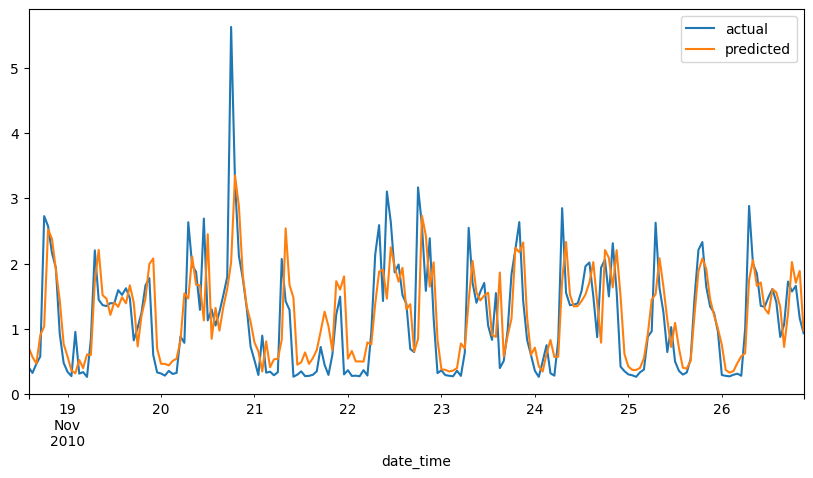

In [16]:
y_pred = autogluon_automl.predict(df_test)
autogluon_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(10, 5))